# Zadanie 1
 

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from time import time

N = 10 ** 7

val = np.float32((random.random() * 0.8) + 0.1)
val = np.float32(0.53125)

array = [val for _ in range(N)]

S = np.float32(0)

for x in array:
    S += x

print("Array size: ", N)
print("Value: ", val)
print("Real value: ", N * val)
print("Summation value:", S)

print()
print('Absolute error: ', abs(S - N*val))
print('Approximation error: ', abs(S - N*val) / S)

Array size:  10000000
Value:  0.53125
Real value:  5312500.0
Summation value: 5030840.5

Absolute error:  281659.5
Approximation error:  0.05598656924225683


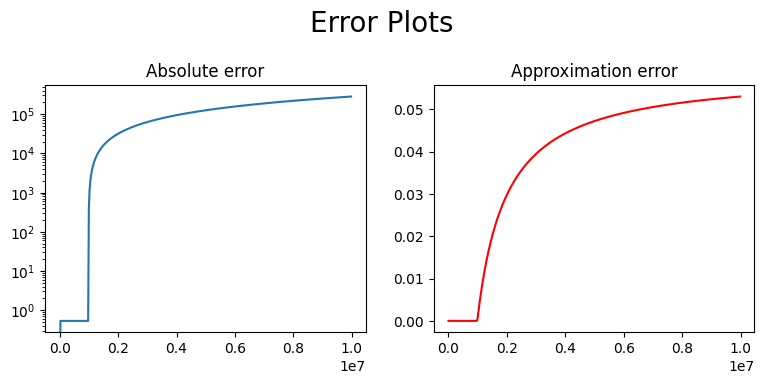

In [34]:
step = 25000

S1 = np.float32(0)
reportX = [i for i in range(0, N, step)]
reportAbsoluteError = [0 for i in range(0, N, step)]
reportApproximationError = [0 for i in range(0, N, step)]

for i, x in enumerate(array):
    S1 += x

    if i % step == 0 and i != 0:
        absError = abs(S1 - i*val)
        appError = absError / (i*val)

        reportAbsoluteError[i // step] = absError
        reportApproximationError[i // step] = appError

matplotlib.rcParams['figure.figsize'] = [8, 4]
figure, axis = plt.subplots(1, 2)

axis[0].set_yscale('log')

axis[0].plot(reportX, reportAbsoluteError)
axis[1].plot(reportX, reportApproximationError, 'r')

figure.suptitle('Error Plots', fontsize=20)
figure.tight_layout(pad=2)
axis[0].set_title("Absolute error")
axis[1].set_title("Approximation error")

plt.show()


In [35]:
def recurAdd(array, i, j):
    if j < i:
        return np.float32(0)

    if i + 1 == j:
        return array[i] + array[j]
    
    if i == j:
        return array[i]
    
    return recurAdd(array, i, (i + j) // 2) +  recurAdd(array, (i + j) // 2 + 1, j)

recurStart = time()
recurVal = recurAdd(array, 0, N - 1)
recurTime = time() -  recurStart

S2 = np.float32(0)
linearStart = time()
for x in array:
    S2 += x
linearTime = time() - linearStart

print("Array size: ", N)
print("Value: ", val)
print("Real value: ", N * val)
print("Summation value:", recurVal)

print()
print('Absolute error: ', abs(recurVal - N*val))
print('Approximation error: ', abs(recurVal - N*val) / S)

print()
print("BENCHMARK")
print("Recursive: ", recurTime, "s.")
print("Linear: ", linearTime, "s.")


Array size:  10000000
Value:  0.53125
Real value:  5312500.0
Summation value: 5312500.0

Absolute error:  0.0
Approximation error:  0.0
BENCHMARK
Recursive:  2.0996742248535156 s.
Linear:  0.9463791847229004 s.
